In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Download the dataset if you haven't already
import requests
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
response = requests.get(url)
with open("car_fuel_efficiency.csv", "wb") as f:
    f.write(response.content)
# Load the dataset
df = pd.read_csv('car_fuel_efficiency.csv')
# Use only the specified columns
columns_to_use = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
df = df[columns_to_use]

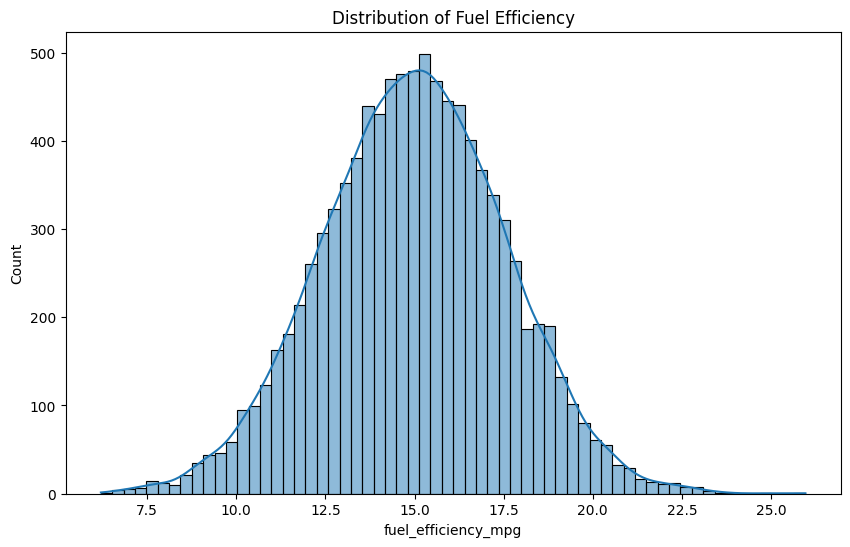

Missing values per column:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [2]:
# Look at the distribution of fuel_efficiency_mpg
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['fuel_efficiency_mpg'], kde=True)
plt.title('Distribution of Fuel Efficiency')
plt.show()
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

In [3]:
# Calculate the median of horsepower
horsepower_median = df['horsepower'].median()
print(f"Median horsepower: {horsepower_median}")

Median horsepower: 149.0


In [4]:
# Shuffle the dataset with seed 42
df_shuffled = df.sample(frac=1, random_state=42)
# Prepare features and target
X = df_shuffled.drop('fuel_efficiency_mpg', axis=1)
y = df_shuffled['fuel_efficiency_mpg']
# Split into train/val/test with 60%/20%/20% distribution
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 5822
Validation set size: 1941
Test set size: 1941


In [5]:
from sklearn.linear_model import LinearRegression
# Identify the column with missing values (from Q1)
missing_column = 'horsepower'  # Replace with the actual column name from Q1
# Approach 1: Fill missing values with 0
X_train_zero = X_train.copy()
X_val_zero = X_val.copy()
X_train_zero[missing_column] = X_train_zero[missing_column].fillna(0)
X_val_zero[missing_column] = X_val_zero[missing_column].fillna(0)
# Train linear regression model with zeros
model_zero = LinearRegression()
model_zero.fit(X_train_zero, y_train)
# Evaluate on validation set
y_pred_zero = model_zero.predict(X_val_zero)
rmse_zero = round(np.sqrt(mean_squared_error(y_val, y_pred_zero)), 2)
print(f"RMSE with missing values filled with 0: {rmse_zero}")
# Approach 2: Fill missing values with mean
mean_value = X_train[missing_column].mean()
X_train_mean = X_train.copy()
X_val_mean = X_val.copy()
X_train_mean[missing_column] = X_train_mean[missing_column].fillna(mean_value)
X_val_mean[missing_column] = X_val_mean[missing_column].fillna(mean_value)
# Train linear regression model with mean
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)
# Evaluate on validation set
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = round(np.sqrt(mean_squared_error(y_val, y_pred_mean)), 2)
print(f"RMSE with missing values filled with mean: {rmse_mean}")
# Compare results
if rmse_zero < rmse_mean:
    print("Filling with 0 is better")
elif rmse_mean < rmse_zero:
    print("Filling with mean is better")
else:
    print("Both approaches are equally good")

RMSE with missing values filled with 0: 0.53
RMSE with missing values filled with mean: 0.47
Filling with mean is better


In [6]:
# Fill missing values with 0
X_train_zero = X_train.copy()
X_val_zero = X_val.copy()
X_train_zero[missing_column] = X_train_zero[missing_column].fillna(0)
X_val_zero[missing_column] = X_val_zero[missing_column].fillna(0)
# Try different regularization values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}
for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train_zero, y_train)
    y_pred = model.predict(X_val_zero)
    rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)), 2)
    rmse_scores[r] = rmse
    print(f"RMSE with r={r}: {rmse}")
# Find the best r
best_r = min(rmse_scores, key=rmse_scores.get)
print(f"Best r value: {best_r} with RMSE: {rmse_scores[best_r]}")

RMSE with r=0: 0.53
RMSE with r=0.01: 0.53
RMSE with r=0.1: 0.53
RMSE with r=1: 0.53
RMSE with r=5: 0.53
RMSE with r=10: 0.53
RMSE with r=100: 0.53
Best r value: 0 with RMSE: 0.53


In [7]:
# Try different seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []
for seed in seeds:
    # Split with the current seed
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=seed)
    # Fill missing values with 0
    X_train_zero = X_train.copy()
    X_val_zero = X_val.copy()
    X_train_zero[missing_column] = X_train_zero[missing_column].fillna(0)
    X_val_zero[missing_column] = X_val_zero[missing_column].fillna(0)
    # Train model without regularization
    model = LinearRegression()
    model.fit(X_train_zero, y_train)
    # Evaluate on validation set
    y_pred = model.predict(X_val_zero)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)
    print(f"Seed {seed}, RMSE: {rmse}")
# Calculate standard deviation
std_dev = round(np.std(rmse_scores), 3)
print(f"Standard deviation of RMSE scores: {std_dev}")

Seed 0, RMSE: 0.5254082607038953
Seed 1, RMSE: 0.5139144322109438
Seed 2, RMSE: 0.49880236451034754
Seed 3, RMSE: 0.5303966388060344
Seed 4, RMSE: 0.5085430055011964
Seed 5, RMSE: 0.5237398967426693
Seed 6, RMSE: 0.5175414192644838
Seed 7, RMSE: 0.5264460745039736
Seed 8, RMSE: 0.5217649728871369
Seed 9, RMSE: 0.5176077586845411
Standard deviation of RMSE scores: 0.009


In [8]:
# Shuffle the dataset with seed 9
df_shuffled = df.sample(frac=1, random_state=9)
# Prepare features and target
X = df_shuffled.drop('fuel_efficiency_mpg', axis=1)
y = df_shuffled['fuel_efficiency_mpg']
# Split into train/val/test with 60%/20%/20% distribution
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=9)
# Combine train and validation datasets
X_train_combined = pd.concat([X_train, X_val])
y_train_combined = pd.concat([y_train, y_val])
# Fill missing values with 0
X_train_combined[missing_column] = X_train_combined[missing_column].fillna(0)
X_test[missing_column] = X_test[missing_column].fillna(0)
# Train model with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_combined, y_train_combined)
# Evaluate on test dataset
y_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test dataset: {rmse_test}")

RMSE on test dataset: 0.5373199712638126
